In [1]:
from groq import Groq
from dotenv import load_dotenv, find_dotenv, set_key, unset_key, get_key
from llm_judge import JokeJudge
import json

import pandas as pd



In [2]:
env_file_path=".env"

def set_api_key():
    api_key=input("🔑 Please enter your groq api key: ")
    if api_key:
        set_key(str(env_file_path),"Groq_key",api_key)
        print("✅ API key set successfully!")
    
    else:
        print("❌ API Key not set!")
        
def get_api_key():
    env_file_path=".env"
    return get_key(str(env_file_path),"Groq_key")

In [4]:
set_api_key()

✅ API key set successfully!


In [3]:
get_api_key()

'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'

### Judge scores without plansearch

In [4]:
judge=JokeJudge(client=Groq(api_key=get_api_key()))

> Due to time constraint, I have decided to evaluate models with the following personality
- llama-3.1-8b-instant_absurdist
- gemma2-9b-it_self_defeating
- deepseek-r1-distill-llama-70b_philosophical
- gemma2-9b-it_aggressive

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
def aggregate_score(judge_output: dict, plot: bool = True) -> pd.Series:
    df = pd.DataFrame(judge_output).T.copy()

    bool_cols = ["isFunny", "would_tell_again", "understood_punchline"]
    for col in bool_cols:
        df[col] = df[col].astype(int)

    numeric_cols = df.select_dtypes(include='number').columns
    categorical_cols = df.select_dtypes(exclude='number').columns

    bayesian_cols = ["score", "originality", "setup_quality"]
    bayesian_result = {}
    m = 5  # prior weight 
    C = 7  # global mean

    for col in bayesian_cols:
        v = len(df)
        R = df[col].mean()
        bayesian_score = (v / (v + m)) * R + (m / (v + m)) * C
        bayesian_result[col] = bayesian_score

    #  mean for confidence
    bayesian_result["confidence"] = df["confidence"].mean()

    # binary (boolean) columns mean
    for col in bool_cols:
        bayesian_result[col] = df[col].mean()

    # mode for categorical modes
    categorical_modes = df[categorical_cols].mode().iloc[0]
    for col in categorical_modes.index:
        bayesian_result[col] = categorical_modes[col]

    if plot and 'score' in df.columns:
        plt.figure(figsize=(10, 5))
        plt.scatter(df.index, df["score"], color="blue", alpha=0.8)
        plt.title("Raw Score by Model")
        plt.xlabel("Model")
        plt.ylabel("Score")
        plt.xticks(rotation=90)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    return pd.Series(bayesian_result)

- score: Mean of all model scores.
- isFunny: Converted to 1 (True) or 0 (False), then averaged to reflect the proportion of models that found the joke funny.
- confidence: Mean of confidence scores across models.
- originality: Mean of originality ratings.
- would_tell_again: Converted to 1 (True) or 0 (False), then averaged to reflect how likely the joke would be repeated.
- understood_punchline: Converted to 1 (True) or 0 (False), then averaged to indicate how widely the punchline was understood.
- setup_quality: Mean of setup quality scores.
- humor_type: Most frequently occurring humor type (mode).
- reason_code: Most frequently mentioned reason code (mode).

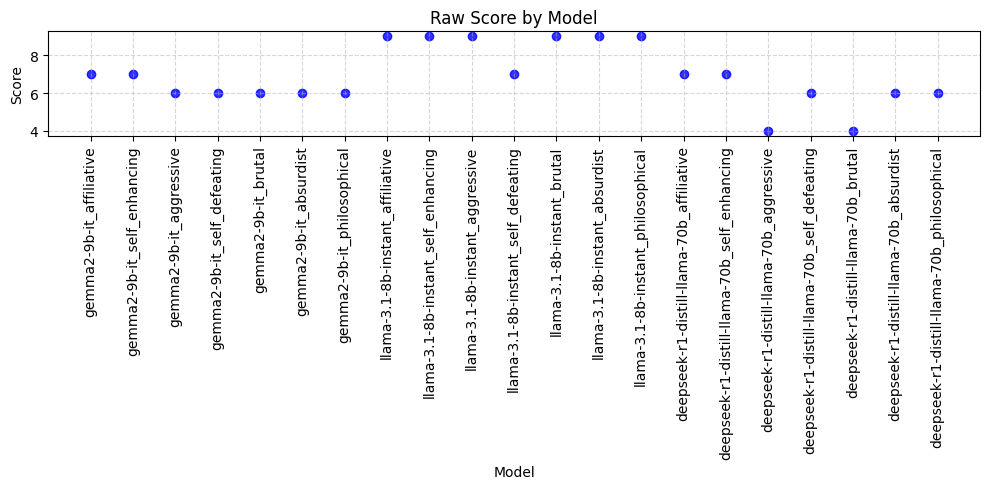

{"score":6,"originality":6,"setup_quality":9,"confidence":9,"isFunny":1.0,"would_tell_again":0.8571428571,"understood_punchline":1.0,"humor_type":"pun","reason_code":"animal_based"}


In [81]:
aggregated=aggregate_score(joke_1_score)
print(aggregated.to_json())

Joke output for joke :Why don’t penguins ever get into arguments? — They just let things slide.
                                             score  isFunny  confidence humor_type    reason_code  originality  would_tell_again  understood_punchline  setup_quality
gemma2-9b-it_aggressive                          6     True           7        pun       dad_joke            3             False                  True              7
gemma2-9b-it_self_defeating                      7     True           8        pun       dad_joke            4              True                  True              6
llama-3.1-8b-instant_absurdist                   9     True           9  absurdism  twisted_logic            8              True                  True              8
deepseek-r1-distill-llama-70b_philosophical      6     True           8   wordplay     clever_pun            5              True                  True              7


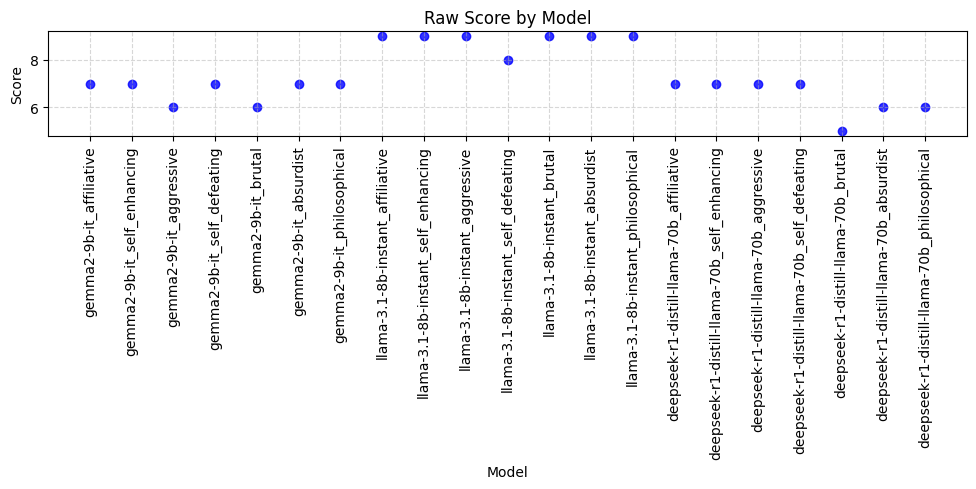

score                              7
originality                        6
setup_quality                      8
confidence                         8
isFunny                          1.0
would_tell_again            0.809524
understood_punchline             1.0
humor_type                       pun
reason_code             clever twist
dtype: object
Joke output for joke :I saw a penguin in a tuxedo once… turns out it was just being itself.
                                             score  isFunny  confidence     humor_type            reason_code  originality  would_tell_again  understood_punchline  setup_quality
gemma2-9b-it_aggressive                          3     True           6  observational          mild_surprise            3             False                  True              7
gemma2-9b-it_self_defeating                      6     True           7  observational       unexpected twist            5              True                  True              8
llama-3.1-8b-instant_absurd

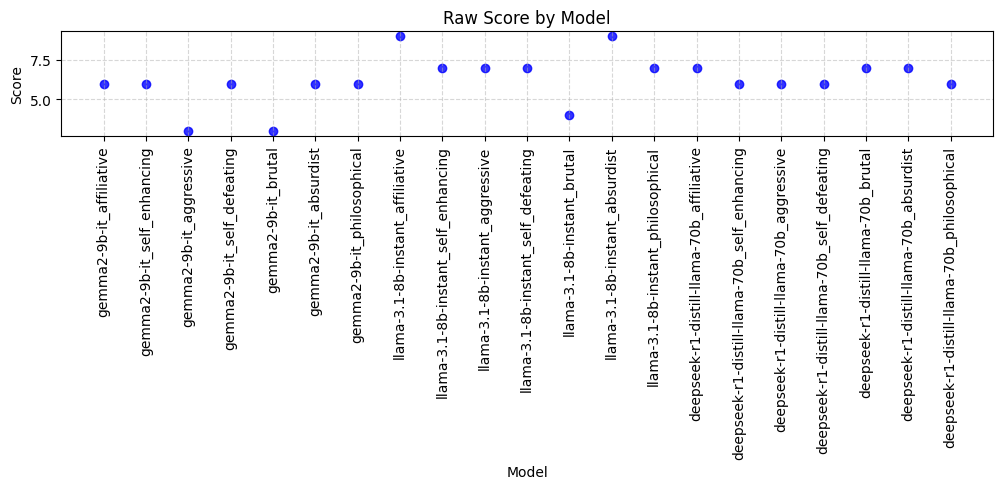

score                                     6
originality                               6
setup_quality                             7
confidence                                8
isFunny                                 1.0
would_tell_again                   0.857143
understood_punchline                    1.0
humor_type                         wordplay
reason_code             clever_misdirection
dtype: object
Joke output for joke :Penguins don’t like talking to strangers — they find it hard to break the ice.
                                             score  isFunny  confidence humor_type       reason_code  originality  would_tell_again  understood_punchline  setup_quality
gemma2-9b-it_aggressive                          6     True           7        pun       classic_pun            4              True                  True              7
gemma2-9b-it_self_defeating                      7     True           8        pun       classic_pun            5              True                  Tr

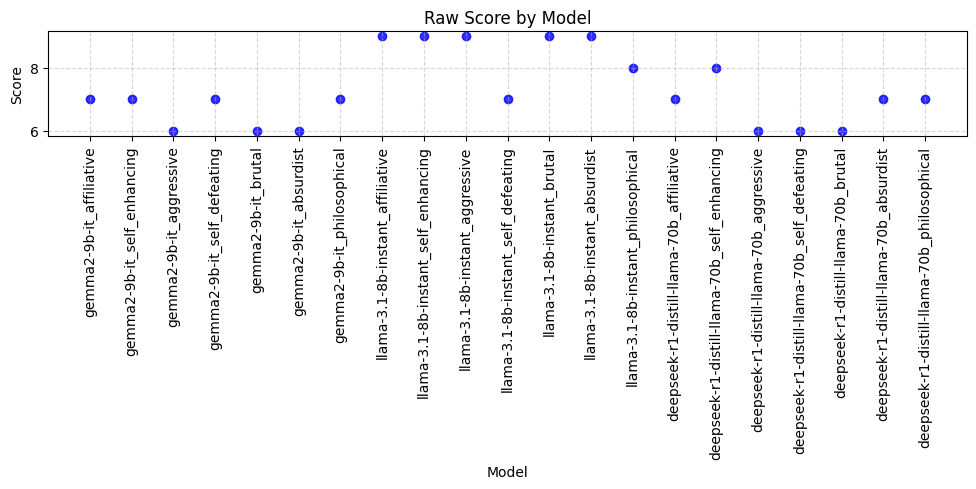

score                             7
originality                       6
setup_quality                     8
confidence                        9
isFunny                         1.0
would_tell_again                1.0
understood_punchline            1.0
humor_type                      pun
reason_code             classic_pun
dtype: object
                                                joke  composite_score
2  Penguins don’t like talking to strangers — the...             0.75
0  Why don’t penguins ever get into arguments? — ...             0.60
[('Why don’t penguins ever get into arguments? — They just let things slide.', {'score': 7, 'originality': 6, 'setup_quality': 8, 'confidence': 8, 'isFunny': 1.0, 'would_tell_again': 0.8095238095238095, 'understood_punchline': 1.0, 'humor_type': 'pun', 'reason_code': 'clever twist'}), ('I saw a penguin in a tuxedo once… turns out it was just being itself.', {'score': 6, 'originality': 6, 'setup_quality': 7, 'confidence': 8, 'isFunny': 1.0, 'would_t

In [5]:
joke_3="A recent study has found that women who carry a little extra weight live longer than the men who mention it."
joke_list=["Why don’t penguins ever get into arguments? — They just let things slide.","I saw a penguin in a tuxedo once… turns out it was just being itself.","Penguins don’t like talking to strangers — they find it hard to break the ice."]
print(judge.evaluate_multiple_jokes(joke_list))

 nice :)

### novelty

In [7]:
from novelty_measure import Novelty_Detect
nd=Novelty_Detect(client=Groq(api_key=get_api_key()),create_joke_embed=False,create_acu_embed=False)
baseline_nov=nd.baseline_novelty(joke_list)
novelty_scores=nd.novascore(joke_list)

RuntimeError: Error in faiss::FileIOReader::FileIOReader(const char *) at /Users/runner/work/faiss-wheels/faiss-wheels/faiss/faiss/impl/io.cpp:68: Error: 'f' failed: could not open src/embeddings/joke_level/joke_index.faiss for reading: No such file or directory